# Machine Learning (CNN-LSTM)-based Stock Price Prediction and Portfolio Optimization

### Model Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4505    0  4505    0     0  13994      0 --:--:-- --:--:-- --:--:-- 14034
100  517k  100  517k    0     0   418k      0  0:00:01  0:00:01 --:--:--  871k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4469    0  4469    0     0   8668      0 --:--:-- --:--:-- --:--:--  8660
100  392k  100  392k    0     0   277k      0  0:00:01  0:00:01 --:--:-- 1901k


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns #Visualization
np.random.seed(1)
data = pd.read_csv('/content/drive/MyDrive/AAPL.csv')
#data = pd.read_csv('/content/AAPL_qm-pricehistory-15y.csv_after_cleaning.csv')

In [ ]:
data = data.iloc[:, :-4]
data.head()

,Date,Open,High,Low,Close,Volume,H-L
0,2008-10-03,3.1678,3.2439,2.8830,2.9567,81941512,0.3609
1,2008-10-06,2.8010,3.0088,2.6664,2.9893,75250025,0.3424
2,2008-10-07,3.0606,3.0916,2.7094,2.7158,67095732,0.3822
3,2008-10-08,2.6168,2.9341,2.6098,2.7349,78843320,0.3243
4,2008-10-09,2.8434,2.9180,2.6378,2.7030,57757602,0.2802


In [ ]:
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['EWMA_12'] = data['Close'].ewm(span=12).mean()
data['std_5'] = data['Close'].rolling(window=5).std()
data['std_10'] = data['Close'].rolling(window=10).std()
data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 14)
data['Williams %R'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 7)
data['SAR'] = talib.SAR(np.array(data['High']), np.array(data['Low']), 0.2, 0.2)
data['ADX'] = talib.ADX(np.array(data['High']), np.array(data['Low']), np.array(data['Close']), 10)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,H-L,ma_5,ma_10,EWMA_12,std_5,std_10,RSI,Williams %R,SAR,ADX
0,2008-10-03,3.1678,3.2439,2.8830,2.9567,81941512,0.3609,NaN,NaN,2.956700,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-10-06,2.8010,3.0088,2.6664,2.9893,75250025,0.3424,NaN,NaN,2.974358,NaN,NaN,NaN,NaN,3.2439,NaN
2,2008-10-07,3.0606,3.0916,2.7094,2.7158,67095732,0.3822,NaN,NaN,2.873443,NaN,NaN,NaN,NaN,3.1284,NaN
3,2008-10-08,2.6168,2.9341,2.6098,2.7349,78843320,0.3243,NaN,NaN,2.829710,NaN,NaN,NaN,NaN,3.0916,NaN
4,2008-10-09,2.8434,2.9180,2.6378,2.7030,57757602,0.2802,2.81994,NaN,2.795284,0.140657,NaN,NaN,NaN,3.0916,NaN


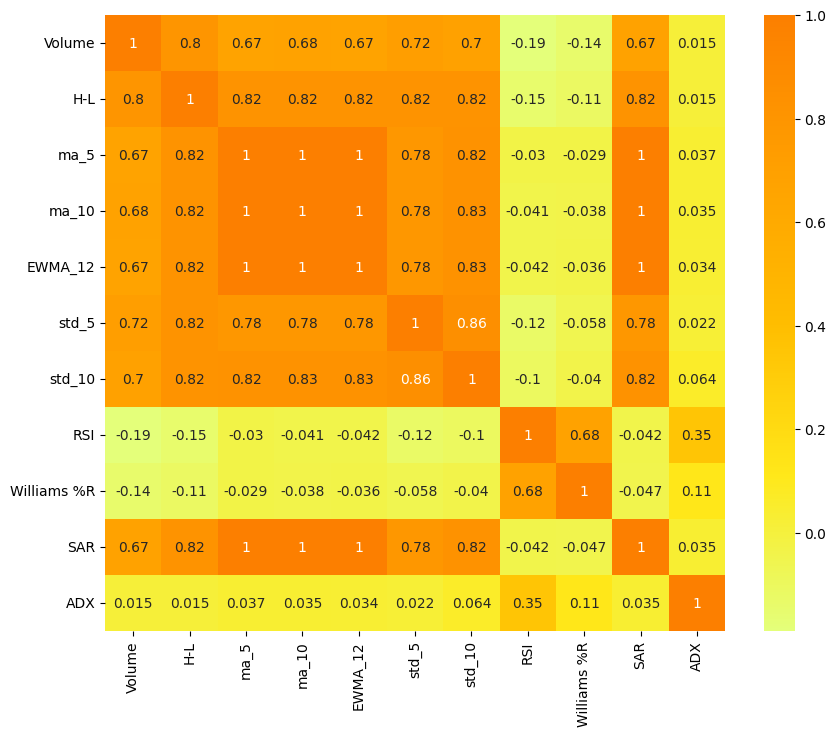

In [ ]:
last_ten_columns = data.iloc[:, -11:]
corr = last_ten_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.show()

<ipython-input-7-89b7bc9e6bae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = first_five_columns.corr()


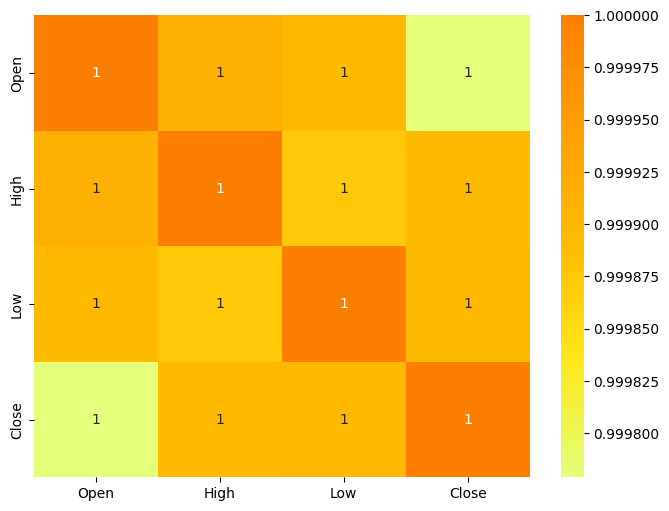

In [ ]:
first_five_columns = data.iloc[:, 0:5]
corr = first_five_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.show()

In [ ]:
data = data.dropna()
data.head()

,Date,Open,High,Low,Close,Volume,H-L,ma_5,ma_10,EWMA_12,std_5,std_10,RSI,Williams %R,SAR,ADX
19,2008-10-30,3.2966,3.4172,3.2777,3.3822,58460152,0.1395,3.07012,3.00450,3.053692,0.223360,0.174182,59.694914,-5.204461,2.813500,12.717888
20,2008-10-31,3.2713,3.3743,3.2025,3.2771,59275558,0.1718,3.13840,3.03554,3.089124,0.224176,0.193305,56.677035,-20.832714,2.934240,13.375543
21,2008-11-03,3.2266,3.3231,3.1940,3.2579,37782578,0.1291,3.22898,3.06149,3.115765,0.125619,0.204839,56.118878,-23.687732,3.030832,13.861890
22,2008-11-04,3.3502,3.4050,3.2491,3.3807,49951809,0.1559,3.29648,3.12089,3.157417,0.084918,0.202411,58.906323,-5.894703,3.108106,15.007022
23,2008-11-05,3.3173,3.3420,3.1370,3.1464,44880056,0.2050,3.28886,3.14047,3.155691,0.098156,0.193377,52.105370,-44.856717,3.417200,14.580438


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,Date,Open,High,Low,Close,Volume,H-L,ma_5,ma_10,EWMA_12,std_5,std_10,RSI,Williams %R,SAR,ADX
0,2008-10-30,3.2966,3.4172,3.2777,3.3822,58460152,0.1395,3.07012,3.00450,3.053692,0.223360,0.174182,59.694914,-5.204461,2.813500,12.717888
1,2008-10-31,3.2713,3.3743,3.2025,3.2771,59275558,0.1718,3.13840,3.03554,3.089124,0.224176,0.193305,56.677035,-20.832714,2.934240,13.375543
2,2008-11-03,3.2266,3.3231,3.1940,3.2579,37782578,0.1291,3.22898,3.06149,3.115765,0.125619,0.204839,56.118878,-23.687732,3.030832,13.861890
3,2008-11-04,3.3502,3.4050,3.2491,3.3807,49951809,0.1559,3.29648,3.12089,3.157417,0.084918,0.202411,58.906323,-5.894703,3.108106,15.007022
4,2008-11-05,3.3173,3.3420,3.1370,3.1464,44880056,0.2050,3.28886,3.14047,3.155691,0.098156,0.193377,52.105370,-44.856717,3.417200,14.580438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2023-09-26,174.8200,175.2000,171.6600,171.9600,64588945,3.5400,174.45000,175.42500,176.148647,1.606596,2.016280,38.422930,-96.266335,177.594400,27.145347
3751,2023-09-27,172.6200,173.0400,169.0500,170.4300,66921808,3.9900,173.43800,175.04700,175.268855,2.251815,2.552415,36.448541,-87.036167,176.970000,28.829488
3752,2023-09-28,169.3400,172.0300,167.6200,170.6900,56294419,4.4100,172.79000,174.54200,174.564416,2.524510,2.878780,37.040606,-74.575569,175.386000,30.819260
3753,2023-09-29,172.0200,173.0700,170.3410,171.2100,51861083,2.7290,172.07400,174.16200,174.048352,2.314396,3.055515,38.279092,-62.046728,173.832800,31.658038


In [ ]:
data['Label'] = ''
data_close = data['Close']
for i in range(len(data_close)-5):
    if data_close[i+5]/data_close[i] >= 1.01:
        label = 1
    elif data_close[i+5]/data_close[i] <= 0.99:
        label = 2
    else:
        label = 0
    data.at[i, 'Label'] = label

In [ ]:
data['Label'].value_counts()

1    1767
2    1174
0     809
        5
Name: Label, dtype: int64

In [ ]:
data = data[:-5]
data_cnn = data.copy()
data_lstm = data.copy()
data_cnn_lstm = data.copy()

# For traditional models

In [ ]:
X = data.iloc[:, 5:-1]
y = data.iloc[:, -1]
y = y.astype('int')

split = int(len(data)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2999, 15)
y_train (2999,)
X_test (750, 15)
y_test (750,)


In [ ]:
from sklearn import svm
from collections import Counter
from sklearn.metrics import classification_report

# sigmoid', 'linear', 'poly', 'rbf'
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:',confidence)

#predictions = clf.predict(X_test)
#print('predicted class counts:',Counter(predictions))

# calculate fbeat score with beta = 0.5
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, clf.predict(X_test), average='macro', beta=0.5)
print(fbeta)

#report = classification_report(y_test, clf.predict(X_test))
#print(report)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svm_classifier = svm.SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, y_train)

confidence = best_svm.score(X_test, y_test)
print('Best hyperparameters:', best_params)
print('Optimized accuracy:', confidence)

Best hyperparameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Optimized accuracy: 0.44533333333333336
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.45      1.00      0.62       334
           2       0.00      0.00      0.00       270

    accuracy                           0.45       750
   macro avg       0.15      0.33      0.21       750
weighted avg       0.20      0.45      0.27       750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import fbeta_score
beta = 0.5
fbeta = fbeta_score(y_test, y_pred, beta=beta, average='weighted')
print(f'F-beta score (beta={beta}, average="weighted"): {fbeta:.4f}')

F-beta score (beta=0.5, average="weighted"): 0.2231


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
confidence = model.score(X_test, y_test)
print('accuracy:',confidence)

#predictions = clf.predict(X_test)
#print('predicted class counts:',Counter(predictions))

# calculate fbeat score with beta = 0.5
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, model.predict(X_test), average='macro', beta=0.5)
print(fbeta)
#report = classification_report(y_test, model.predict(X_test))
#print(report)

accuracy: 0.44266666666666665
0.17750101047468334


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, fbeta_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_classifier = LogisticRegression()

grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_logistic = LogisticRegression(**best_params)
best_logistic.fit(X_train, y_train)

y_pred = best_logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', best_params)
print('Optimized accuracy:', accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized accuracy: 0.44533333333333336
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.45      1.00      0.62       334
           2       0.00      0.00      0.00       270

    accuracy                           0.45       750
   macro avg       0.15      0.33      0.21       750
weighted avg       0.20      0.45      0.27       750

F-beta score (beta=0.5): 0.16696660667866425


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(max_depth=10,min_samples_split=10,n_estimators=300,random_state=42)
model.fit(X_train, y_train)

confidence = model.score(X_test, y_test)
print('accuracy:',confidence)

y_pred = model.predict(X_test)


#report = classification_report(y_test, model.predict(X_test))
#print(report)
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, model.predict(X_test), average='macro', beta=0.5)
print(fbeta)

accuracy: 0.36933333333333335
0.18093046792226067


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': 5244,
    'verbose': 0,
    'warm_start': False
}


rf_model = RandomForestClassifier(**best_params)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, rf_model.predict(X_test), average='macro', beta=0.5)
print(fbeta)

Model Accuracy: 0.36
0.1980097643672496


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300],
    'random_state': [42]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

confidence = best_rf_model.score(X_test, y_test)
print('Best hyperparameters:', best_params)
print('Optimized accuracy:', confidence)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Optimized accuracy: 0.364
F-beta score (beta=0.5): 0.1806741713608241


In [ ]:
!pip install pycaret

In [ ]:
# init setup
from pycaret.classification import *
data = data.iloc[:, 5:]
data['Label'] = data['Label'].astype(int)
s = setup(data, target = 'Label')

# model training and selection
best = compare_models()

# evaluate trained model
evaluate_model(best)

# predict on hold-out/test set
pred_holdout = predict_model(best)

In [ ]:
# model training and selection
top2 = compare_models(n_select=2)


second_best_model = top2[1]
second_best_model_params = second_best_model.get_params()

print(second_best_model_params)


# LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from sklearn.metrics import fbeta_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# show features
data = data_lstm
data.columns[:-1]

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'H-L', 'ma_5',
       'ma_10', 'EWMA_12', 'std_5', 'std_10', 'RSI', 'Williams %R', 'SAR',
       'ADX'],
      dtype='object')

In [ ]:
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'H-L', 'ma_5',
       'ma_10', 'EWMA_12', 'std_5', 'std_10', 'RSI', 'Williams %R', 'SAR',
       'ADX']
X = data[feature_columns]

# Initialize the MinMaxScaler for features
scaler = MinMaxScaler()

# Fit the scaler on the selected features (X) and transform them
X_scaled = scaler.fit_transform(X)

# Replace the original feature columns with the scaled values in the DataFrame
data[feature_columns] = X_scaled

In [ ]:
data = data.iloc[:, 5:]
data['Label'] = data['Label'].astype(int)
data

,Volume,H-L,ma_5,ma_10,EWMA_12,std_5,std_10,RSI,Williams %R,SAR,ADX,Label
0,0.161592,0.008352,0.002911,0.002095,0.002356,0.024532,0.017961,0.555232,0.947955,0.002207,0.051309,2
1,0.164085,0.010926,0.003266,0.002257,0.002542,0.024628,0.020300,0.511895,0.791673,0.002824,0.060736,2
2,0.098355,0.007523,0.003737,0.002393,0.002681,0.013067,0.021711,0.503880,0.763123,0.003318,0.067709,2
3,0.135571,0.009659,0.004087,0.002703,0.002899,0.008293,0.021414,0.543908,0.941053,0.003713,0.084125,2
4,0.120060,0.013572,0.004048,0.002805,0.002890,0.009846,0.020309,0.446245,0.551433,0.005293,0.078009,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.141306,0.196471,0.904040,0.914703,0.921091,0.238412,0.305159,0.382595,0.816964,0.876559,0.271584,2
3746,0.161518,0.339523,0.905370,0.910825,0.918590,0.205366,0.214212,0.303747,0.291603,0.882501,0.261523,2
3747,0.175932,0.191689,0.903488,0.908928,0.915218,0.249893,0.239438,0.272686,0.057236,0.906598,0.262185,2
3748,0.156286,0.238630,0.903260,0.907156,0.913056,0.253987,0.236437,0.298133,0.197874,0.906598,0.254343,2


In [ ]:
seq_len = 5
amount_of_features = len(data.columns)#有几列
data = data.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1 #序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum

split = int(len(result)*0.8)
train = result[:split, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[split:, :-1]
y_test = result[split:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2995, 5, 12)
y_train (2995,)
X_test (749, 5, 12)
y_test (749,)


In [ ]:
X_train

array([[[0.1615916 , 0.008352  , 0.00291067, ..., 0.00220676,
         0.05130867, 2.        ],
        [0.16408532, 0.01092613, 0.00326565, ..., 0.0028241 ,
         0.0607365 , 2.        ],
        [0.09835454, 0.00752317, 0.00373657, ..., 0.00331798,
         0.06770852, 2.        ],
        [0.13557102, 0.00965899, 0.0040875 , ..., 0.00371307,
         0.08412458, 2.        ],
        [0.12006036, 0.01357199, 0.00404788, ..., 0.00529347,
         0.07800929, 2.        ]],

       [[0.16408532, 0.01092613, 0.00326565, ..., 0.0028241 ,
         0.0607365 , 2.        ],
        [0.09835454, 0.00752317, 0.00373657, ..., 0.00331798,
         0.06770852, 2.        ],
        [0.13557102, 0.00965899, 0.0040875 , ..., 0.00371307,
         0.08412458, 2.        ],
        [0.12006036, 0.01357199, 0.00404788, ..., 0.00529347,
         0.07800929, 2.        ],
        [0.12687827, 0.00883813, 0.00366971, ..., 0.00523109,
         0.0653758 , 2.        ]],

       [[0.09835454, 0.00752317, 0.0

In [ ]:
y_train

array([2., 2., 2., ..., 1., 0., 0.])

In [ ]:
from sklearn.metrics import f1_score
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, 12), return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=128)

# Evaluate the model using F-beta score
# y_pred = model.predict_classes(X_test)
y_pred  = np.argmax(model.predict(X_test), axis=-1)
f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')
print("F-beta score:", fbeta)

Epoch 1/30
24/24 [==============================] - 6s 13ms/step - loss: 1.0117 - accuracy: 0.5259
Epoch 2/30
24/24 [==============================] - 0s 12ms/step - loss: 0.9000 - accuracy: 0.6207
Epoch 3/30
24/24 [==============================] - 0s 12ms/step - loss: 0.8126 - accuracy: 0.6638
Epoch 4/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7688 - accuracy: 0.6932
Epoch 5/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7411 - accuracy: 0.7018
Epoch 6/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7267 - accuracy: 0.7072
Epoch 7/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7226 - accuracy: 0.7065
Epoch 8/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7211 - accuracy: 0.7068
Epoch 9/30
24/24 [==============================] - 0s 12ms/step - loss: 0.7110 - accuracy: 0.7082
Epoch 10/30
24/24 [==============================] - 0s 12ms/step - loss: 0.6995 - accuracy: 0.7149
Epoch 11/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            72192     
                                                                 
 batch_normalization (Batch  (None, 5, 128)            512       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             49408     
                                                                 
 batch_normalization_1 (Bat  (None, 5, 64)             256       
 chNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0

# CNN

In [ ]:
from __future__ import print_function
import math
#importing keras modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from math import sqrt
from keras.models import Sequential
from sklearn.metrics import fbeta_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [ ]:
data = data_cnn
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'H-L', 'ma_5',
       'ma_10', 'EWMA_12', 'std_5', 'std_10', 'RSI', 'Williams %R', 'SAR',
       'ADX']
X = data[feature_columns]

# Initialize the MinMaxScaler for features
scaler = MinMaxScaler()

# Fit the scaler on the selected features (X) and transform them
X_scaled = scaler.fit_transform(X)

# Replace the original feature columns with the scaled values in the DataFrame
data[feature_columns] = X_scaled

In [ ]:
data = data.iloc[:, 5:]
data['Label'] = data['Label'].astype(int)
seq_len = 5
amount_of_features = len(data.columns)
data = data.values
sequence_length = seq_len + 1
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)

split = int(len(result)*0.8)
train = result[:split, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[split:, :-1]
y_test = result[split:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2995, 5, 12)
y_train (2995,)
X_test (749, 5, 12)
y_test (749,)


In [ ]:
from sklearn.metrics import f1_score
# Build the more advanced CNN model using Keras
model = Sequential()
model.add(Conv1D(filters = 112, kernel_size= 1,padding='valid', activation='relu', kernel_initializer="uniform", input_shape=(5, 12)))
model.add(MaxPooling1D(pool_size=2, padding='valid'))
model.add(Conv1D(filters = 64,kernel_size = 1,padding='valid', activation='relu', kernel_initializer="uniform"))
model.add(MaxPooling1D(pool_size=1, padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
model.add(Dense(3, activation="softmax", kernel_initializer="uniform"))
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=128)

# Evaluate the model using F-beta score
# y_pred = model.predict_classes(X_test)
y_pred  = np.argmax(model.predict(X_test), axis=-1)
f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')
print("F-beta score:", fbeta)

Epoch 1/30
24/24 [==============================] - 6s 8ms/step - loss: 1.0872 - accuracy: 0.4775
Epoch 2/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0532 - accuracy: 0.4785
Epoch 3/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0501 - accuracy: 0.4785
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0485 - accuracy: 0.4785
Epoch 5/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0426 - accuracy: 0.4785
Epoch 6/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0277 - accuracy: 0.4785
Epoch 7/30
24/24 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.5309
Epoch 8/30
24/24 [==============================] - 0s 5ms/step - loss: 0.9756 - accuracy: 0.5746
Epoch 9/30
24/24 [==============================] - 0s 5ms/step - loss: 0.9659 - accuracy: 0.5793
Epoch 10/30
24/24 [==============================] - 0s 4ms/step - loss: 0.9581 - accuracy: 0.5820
Epoch 11/30
24/24 [

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 112)            1456      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 112)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             7232      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 2, 64)             0         
                                                                 
 flatten (Flatten)           (None, 128)              

# CNN+LSTM

In [ ]:
data = data_cnn_lstm.copy()

In [ ]:
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'H-L', 'ma_5',
       'ma_10', 'EWMA_12', 'std_5', 'std_10', 'RSI', 'Williams %R', 'SAR',
       'ADX']
X = data[feature_columns]

# Initialize the MinMaxScaler for features
scaler = MinMaxScaler()

# Fit the scaler on the selected features (X) and transform them
X_scaled = scaler.fit_transform(X)

# Replace the original feature columns with the scaled values in the DataFrame
data[feature_columns] = X_scaled

In [ ]:
data = data.iloc[:, 5:]
data['Label'] = data['Label'].astype(int)
seq_len = 5
amount_of_features = len(data.columns)
data = data.values
sequence_length = seq_len + 1
result = []
for index in range(len(data) - sequence_length+1):
    result.append(data[index: index + sequence_length])
result = np.array(result)

split = int(len(result)*0.8)
train = result[:split, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[split:, :-1]
y_test = result[split:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2996, 5, 12)
y_train (2996,)
X_test (749, 5, 12)
y_test (749,)


In [ ]:
time_data = data_cnn_lstm
time_data = time_data.iloc[split:, :]
time_data = time_data.iloc[5:,:]
time_data = time_data.loc[:,['Date','Close']]
time_data

,Date,Close
3001,2020-10-02,111.0136
3002,2020-10-05,114.4318
3003,2020-10-06,111.1511
3004,2020-10-07,113.0370
3005,2020-10-08,112.9289
...,...,...
3745,2023-09-19,179.0700
3746,2023-09-20,175.4900
3747,2023-09-21,173.9300
3748,2023-09-22,174.7900


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
model = Sequential()
model.add(Conv1D(64, 3, input_shape=(5, 12), activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=128)

# Summary of the model to see the architecture
y_pred  = np.argmax(model.predict(X_test), axis=-1)

fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')
print("F-beta score:", fbeta)


Epoch 1/20
24/24 [==============================] - 3s 8ms/step - loss: 1.0516 - accuracy: 0.4735
Epoch 2/20
24/24 [==============================] - 0s 6ms/step - loss: 0.9829 - accuracy: 0.5740
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 0.9130 - accuracy: 0.6247
Epoch 4/20
24/24 [==============================] - 0s 6ms/step - loss: 0.8757 - accuracy: 0.6411
Epoch 5/20
24/24 [==============================] - 0s 6ms/step - loss: 0.8353 - accuracy: 0.6564
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 0.7990 - accuracy: 0.6711
Epoch 7/20
24/24 [==============================] - 0s 7ms/step - loss: 0.7669 - accuracy: 0.6785
Epoch 8/20
24/24 [==============================] - 0s 6ms/step - loss: 0.7634 - accuracy: 0.6835
Epoch 9/20
24/24 [==============================] - 0s 8ms/step - loss: 0.7502 - accuracy: 0.6908
Epoch 10/20
24/24 [==============================] - 0s 8ms/step - loss: 0.7404 - accuracy: 0.6935
Epoch 11/20
24/24 [

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 5, 64)             2368      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 2, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 2, 128)            24704     
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 1, 128)            0         
 ng1D)                                                           
                                                                 
 lstm_9 (LSTM)               (None, 100)               91600     
                                                                 
 dropout_8 (Dropout)         (None, 100)              

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
model = Sequential()
# CNN layers to process the features
model.add(Conv1D(64, 3, input_shape=(5, 12), activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
# LSTM layer to process the temporal sequences. No Flatten layer before LSTM.
model.add(LSTM(100))  # By default, return_sequences=False
model.add(Dropout(0.2))
# Output layer for classification
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=128)
# Summary of the model to see the architecture
y_pred  = np.argmax(model.predict(X_test), axis=-1)

fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')
print("F-beta score:", fbeta)


Epoch 1/20
24/24 [==============================] - 13s 26ms/step - loss: 1.0522 - accuracy: 0.4723
Epoch 2/20
24/24 [==============================] - 0s 11ms/step - loss: 0.9830 - accuracy: 0.5864
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 0.9091 - accuracy: 0.6308
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 0.8647 - accuracy: 0.6512
Epoch 5/20
24/24 [==============================] - 0s 11ms/step - loss: 0.8206 - accuracy: 0.6562
Epoch 6/20
24/24 [==============================] - 0s 11ms/step - loss: 0.7990 - accuracy: 0.6679
Epoch 7/20
24/24 [==============================] - 0s 10ms/step - loss: 0.7730 - accuracy: 0.6769
Epoch 8/20
24/24 [==============================] - 0s 9ms/step - loss: 0.7616 - accuracy: 0.6812
Epoch 9/20
24/24 [==============================] - 0s 12ms/step - loss: 0.7515 - accuracy: 0.6862
Epoch 10/20
24/24 [==============================] - 0s 13ms/step - loss: 0.7531 - accuracy: 0.6872
Epoch 11/20

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 1 column
plt.figure(figsize=(8, 12))

# First subplot for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Second subplot for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # To ensure proper spacing
plt.show()


In [ ]:
#CNN-LSTM model
from sklearn.metrics import f1_score
# model = Sequential()
# model.add(Conv1D(filters=256, kernel_size= 1, activation='relu', input_shape=(5, 12)))
# model.add(MaxPooling1D(pool_size=5, padding='valid'))
# model.add(Conv1D(filters=64,  kernel_size= 1, activation='relu'))
# model.add(LSTM(128, return_sequences=True))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(32))
# model.add(Flatten())

model = Sequential()
model.add(Conv1D(64, 3, input_shape=(5, 12), padding="same"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, padding="same"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose = 0)

print(history.history['accuracy'][-1])
# Evaluate the model using F-beta score
# y_pred = model.predict_classes(X_test)
y_pred_prob = model.predict(X_test)

y_pred  = np.argmax(y_pred_prob, axis=-1)
f1_score = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')
print("F-beta score:", fbeta)

0.7002670168876648
24/24 [==============================] - 0s 3ms/step
F1 score: 0.6406977406572415
F-beta score: 0.6335903953750899


In [ ]:
y_pred_prob

array([[0.19439602, 0.04413697, 0.761467  ],
       [0.30997434, 0.1620103 , 0.5280154 ],
       [0.13697398, 0.81229335, 0.05073257],
       ...,
       [0.14379698, 0.09345083, 0.7627522 ],
       [0.05226841, 0.03268457, 0.91504705],
       [0.0727557 , 0.01813485, 0.9091094 ]], dtype=float32)

In [ ]:
time_data

,Date,Close
3001,2020-10-02,111.0136
3002,2020-10-05,114.4318
3003,2020-10-06,111.1511
3004,2020-10-07,113.0370
3005,2020-10-08,112.9289
...,...,...
3745,2023-09-19,179.0700
3746,2023-09-20,175.4900
3747,2023-09-21,173.9300
3748,2023-09-22,174.7900


In [ ]:
time_data['Fluc_prob'] = y_pred_prob[:, 0]
time_data['Rise_prob'] = y_pred_prob[:, 1]
time_data['Fall_prob'] = y_pred_prob[:, 2]

In [ ]:
time_data = time_data.reset_index(drop=True)

In [ ]:
time_data

,Date,Close,Fluc_prob,Rise_prob,Fall_prob
0,2020-10-02,111.0136,0.194396,0.044137,0.761467
1,2020-10-05,114.4318,0.309974,0.162010,0.528015
2,2020-10-06,111.1511,0.136974,0.812293,0.050733
3,2020-10-07,113.0370,0.085465,0.870011,0.044524
4,2020-10-08,112.9289,0.128509,0.836888,0.034603
...,...,...,...,...,...
744,2023-09-19,179.0700,0.302116,0.188433,0.509450
745,2023-09-20,175.4900,0.109867,0.018512,0.871621
746,2023-09-21,173.9300,0.143797,0.093451,0.762752
747,2023-09-22,174.7900,0.052268,0.032685,0.915047


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             2368      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 64)             0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 2, 100)            66000     
                                                                 
 dropout (Dropout)           (None, 2, 100)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 128)            38528     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                   

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt


def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('kernel_size_1', values=[2, 3]),
                     activation='relu', input_shape=(5, 12), padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
                     kernel_size=hp.Choice('kernel_size_2', values=[2, 3]),
                     activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(hp.Int('lstm_units', min_value=50, max_value=200, step=50)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of trials to run
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_lstm_tuning')

tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))